In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
import os

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 80)
print("DECISION TREE MODEL - CLIMATEWINS WEATHER PREDICTION")
print("=" * 80)

DECISION TREE MODEL - CLIMATEWINS WEATHER PREDICTION


In [5]:
path = r'/Users/davidscheider/anaconda_projects/ClimateWins/02 Data/Prepared Data'

In [6]:
# Load the datasets
print("\n1. Loading datasets...")

weather_df = pd.read_pickle(os.path.join(path, 'weather_scaled.pkl'))
answers_df = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

print(f"Weather data shape: {weather_df.shape}")
print(f"Answers data shape: {answers_df.shape}")



1. Loading datasets...
Weather data shape: (22950, 171)
Answers data shape: (22950, 16)


In [7]:
# Display first few rows
print("\nWeather data preview:")
print(weather_df.head())
print("\nAnswers data preview:")
print(answers_df.head())



Weather data preview:
       DATE  MONTH        id  BASEL_cloud_cover  BASEL_wind_speed  \
0  19600101      1 -1.731975           0.660514          -0.02793   
1  19600102      1 -1.731824           0.244897          -0.02793   
2  19600103      1 -1.731673           1.076130          -0.02793   
3  19600104      1 -1.731523          -1.001953          -0.02793   
4  19600105      1 -1.731372           0.244897          -0.02793   

   BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0        0.826097       -0.001949               -1.101066   
1        0.735760       -0.001949               -1.058108   
2        1.277781       -0.001949               -1.251420   
3        1.458455       -0.001949               -0.821838   
4        1.729466       -0.001949               -0.746661   

   BASEL_precipitation  BASEL_snow_depth  BASEL_sunshine  BASEL_temp_mean  \
0            -0.265148         -0.179228       -0.902918        -0.528623   
1             1.658760         -0.179228 

In [8]:
# Step 2: Drop the three weather stations with insufficient data
print("\n2. Dropping weather stations: TOURS, ROMA, GDANKS...")

# Identify columns to drop (those containing these station names)
stations_to_drop = ['TOURS', 'ROMA', 'GDANKS']
cols_to_drop = []

for station in stations_to_drop:
    cols_to_drop.extend([col for col in weather_df.columns if station in col])

print(f"Columns to drop: {cols_to_drop}")
weather_df = weather_df.drop(columns=cols_to_drop)

# Also drop from answers
answers_df = answers_df.drop(columns=stations_to_drop, errors='ignore')

print(f"Weather data shape after dropping stations: {weather_df.shape}")
print(f"Answers data shape after dropping stations: {answers_df.shape}")



2. Dropping weather stations: TOURS, ROMA, GDANKS...
Columns to drop: ['TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean']
Weather data shape after dropping stations: (22950, 157)
Answers data shape after dropping stations: (22950, 16)


In [9]:
# Step 3: Prepare X and y datasets
print("\n3. Preparing X and y datasets...")

# Drop DATE and MONTH from weather data
X = weather_df.drop(columns=['DATE', 'MONTH'], errors='ignore')

# Drop DATE from answers and get remaining columns as y
y = answers_df.drop(columns=['DATE'], errors='ignore')

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"\nWeather stations in y: {y.columns.tolist()}")

# Check for any missing values
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum().sum()}")



3. Preparing X and y datasets...
X shape: (22950, 155)
y shape: (22950, 15)

Weather stations in y: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']

Missing values in X: 0
Missing values in y: 0


In [10]:
# Step 4: Split data into training and testing sets
print("\n4. Splitting data into training and testing sets (80/20 split)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


4. Splitting data into training and testing sets (80/20 split)...
Training set size: 18360
Testing set size: 4590


In [11]:
# Step 5: Train Decision Tree Model
print("\n5. Training Decision Tree model...")
print("NOTE: This may take 5-10 minutes for large datasets!")
print("Starting training at:", pd.Timestamp.now())

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=2,
    random_state=42
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Training completed at:", pd.Timestamp.now())



5. Training Decision Tree model...
NOTE: This may take 5-10 minutes for large datasets!
Starting training at: 2025-11-09 14:24:57.717440
Training completed at: 2025-11-09 14:24:59.452554


In [12]:
# Step 6: Make predictions
print("\n6. Making predictions...")
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)


6. Making predictions...


In [13]:
# Step 7: Calculate accuracy for each station
print("\n7. Calculating accuracy for each weather station...")
print("=" * 80)

train_accuracies = {}
test_accuracies = {}

for station in y.columns:
    train_acc = accuracy_score(y_train[station], y_train_pred[:, y.columns.get_loc(station)])
    test_acc = accuracy_score(y_test[station], y_test_pred[:, y.columns.get_loc(station)])
    
    train_accuracies[station] = train_acc
    test_accuracies[station] = test_acc
    
    print(f"\n{station}:")
    print(f"  Training Accuracy: {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"  Testing Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")

# Overall accuracy
overall_train_acc = np.mean(list(train_accuracies.values()))
overall_test_acc = np.mean(list(test_accuracies.values()))

print("\n" + "=" * 80)
print(f"OVERALL TRAINING ACCURACY: {overall_train_acc:.4f} ({overall_train_acc*100:.2f}%)")
print(f"OVERALL TESTING ACCURACY:  {overall_test_acc:.4f} ({overall_test_acc*100:.2f}%)")
print("=" * 80)


7. Calculating accuracy for each weather station...

BASEL_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9512 (95.12%)

BELGRADE_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9580 (95.80%)

BUDAPEST_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9514 (95.14%)

DEBILT_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9320 (93.20%)

DUSSELDORF_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9887 (98.87%)

HEATHROW_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9050 (90.50%)

KASSEL_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9545 (95.45%)

LJUBLJANA_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9832 (98.32%)

MAASTRICHT_pleasant_weather:
  Training Accuracy: 1.0000 (100.00%)
  Testing Accuracy:  0.9320 (93.20%)

MADRID_pleasant_weath


8. Creating confusion matrices for each station...
Confusion matrices saved as 'decision_tree_confusion_matrices.png'


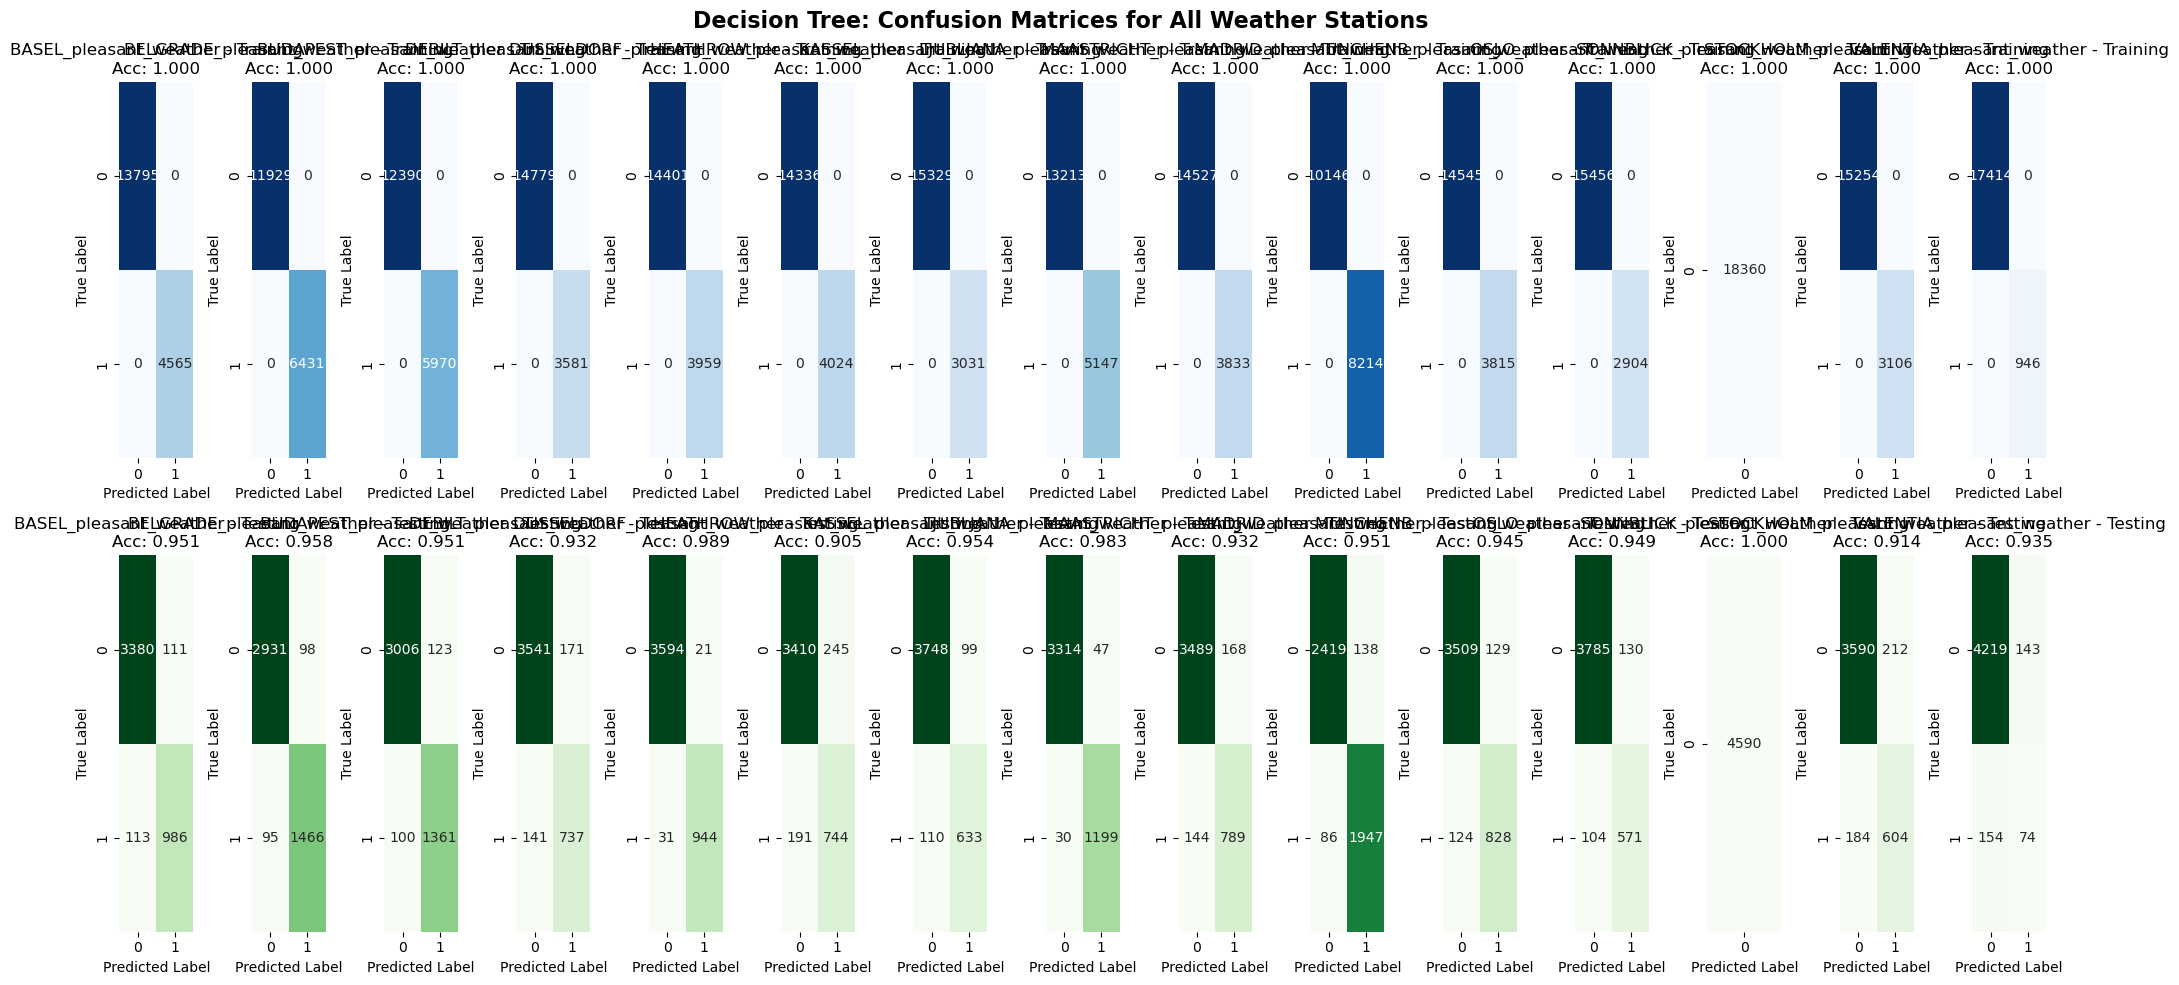

In [14]:
# Step 8: Create confusion matrices for each station
print("\n8. Creating confusion matrices for each station...")

fig, axes = plt.subplots(2, len(y.columns), figsize=(20, 10))
fig.suptitle('Decision Tree: Confusion Matrices for All Weather Stations', fontsize=16, fontweight='bold')

for idx, station in enumerate(y.columns):
    # Training confusion matrix
    cm_train = confusion_matrix(
        y_train[station], 
        y_train_pred[:, idx]
    )
    
    # Testing confusion matrix
    cm_test = confusion_matrix(
        y_test[station], 
        y_test_pred[:, idx]
    )
    
    # Plot training
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                ax=axes[0, idx], cbar=False)
    axes[0, idx].set_title(f'{station} - Training\nAcc: {train_accuracies[station]:.3f}')
    axes[0, idx].set_ylabel('True Label')
    axes[0, idx].set_xlabel('Predicted Label')
    
    # Plot testing
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
                ax=axes[1, idx], cbar=False)
    axes[1, idx].set_title(f'{station} - Testing\nAcc: {test_accuracies[station]:.3f}')
    axes[1, idx].set_ylabel('True Label')
    axes[1, idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.savefig('decision_tree_confusion_matrices.png', dpi=300, bbox_inches='tight')
print("Confusion matrices saved as 'decision_tree_confusion_matrices.png'")
plt.show()



9. Decision Tree Analysis...
Tree depth: 28
Number of leaves: 4989
Number of features used: 155

10. Top 10 Most Important Features:
                      feature  importance
50        DUSSELDORF_temp_max    0.304180
45   DUSSELDORF_precipitation    0.076687
106           MADRID_temp_max    0.054439
82    LJUBLJANA_precipitation    0.053425
16     BELGRADE_precipitation    0.041076
25     BUDAPEST_precipitation    0.031131
6         BASEL_precipitation    0.030981
102      MADRID_precipitation    0.026757
126             OSLO_temp_max    0.025273
110    MUNCHENB_precipitation    0.024062

Feature importance plot saved as 'decision_tree_feature_importance.png'


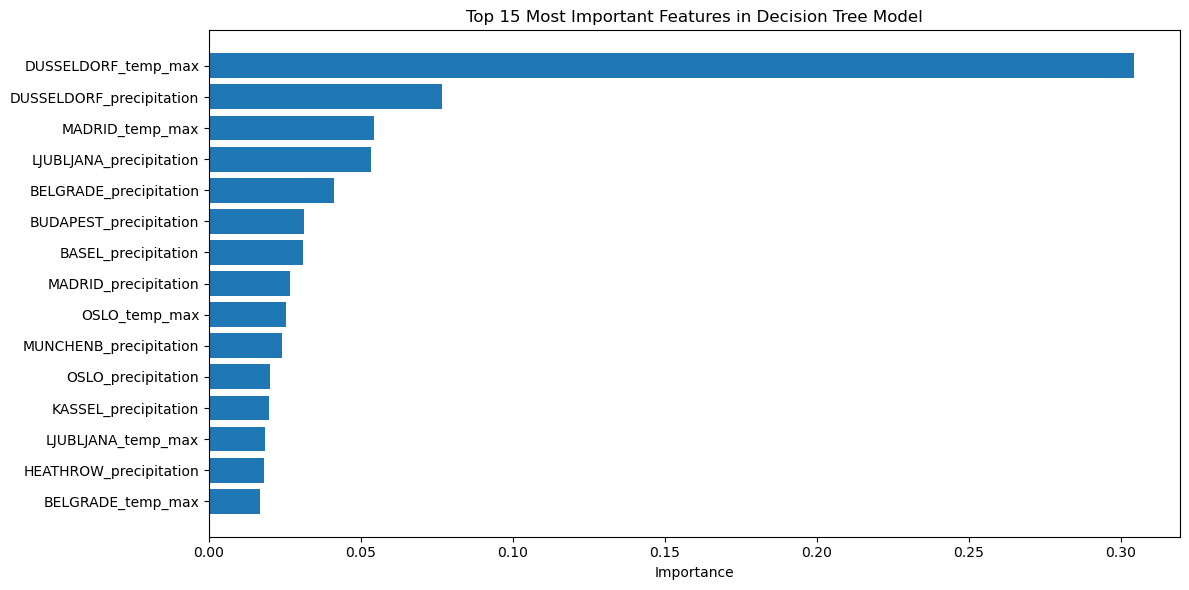

In [15]:
# Step 9: Tree Analysis
print("\n9. Decision Tree Analysis...")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print(f"Number of features used: {dt_classifier.n_features_in_}")

# Feature importance
print("\n10. Top 10 Most Important Features:")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance.head(10))

# Visualization of feature importance
plt.figure(figsize=(12, 6))
top_features = feature_importance.head(15)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features in Decision Tree Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('decision_tree_feature_importance.png', dpi=300, bbox_inches='tight')
print("\nFeature importance plot saved as 'decision_tree_feature_importance.png'")
plt.show()

In [16]:
# Step 10: Analysis Questions
print("\n" + "=" * 80)
print("ANALYSIS & RECOMMENDATIONS")
print("=" * 80)

print("\nQUESTION: Does the decision tree need to be pruned?")
print(f"Tree Depth: {dt_classifier.get_depth()}")
print(f"Number of Leaves: {dt_classifier.get_n_leaves()}")
print(f"Training Accuracy: {overall_train_acc:.4f}")
print(f"Testing Accuracy: {overall_test_acc:.4f}")
print(f"Overfitting indicator (train-test gap): {(overall_train_acc - overall_test_acc)*100:.2f}%")

if overall_train_acc - overall_test_acc > 0.10:
    print("\n⚠️  YES - The tree likely needs pruning!")
    print("Reasoning: Large gap between training and testing accuracy suggests overfitting.")
    print("Recommendation: Consider using max_depth parameter or min_samples_leaf to prune.")
else:
    print("\n✓ The tree appears reasonably balanced.")
    print("The gap between training and testing accuracy is acceptable.")

print("\n" + "=" * 80)
print("Script completed successfully!")
print("=" * 80)


ANALYSIS & RECOMMENDATIONS

QUESTION: Does the decision tree need to be pruned?
Tree Depth: 28
Number of Leaves: 4989
Training Accuracy: 1.0000
Testing Accuracy: 0.9500
Overfitting indicator (train-test gap): 5.00%

✓ The tree appears reasonably balanced.
The gap between training and testing accuracy is acceptable.

Script completed successfully!
